<a href="https://colab.research.google.com/github/sebastianayalagomez03/PRIMER-CORTE/blob/main/Copia_de_TallerSeg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-10-22 23:18:16--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-10-22 23:18:16--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

cus

In [2]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [3]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [4]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [8]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
 10  total_value     99457 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 8.3+ MB


,age,quantity,price,total_value
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,2528.789268
std,14.990054,1.413025,941.184567,4222.475781
min,18.000000,1.000000,5.230000,5.230000
25%,30.000000,2.000000,45.450000,136.350000
50%,43.000000,3.000000,203.300000,600.170000
75%,56.000000,4.000000,1200.320000,2700.720000
max,69.000000,5.000000,5250.000000,26250.000000


## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [5]:
print("Valores nulos por columna:")
print(df.isnull().sum())

# 3. Identificar duplicados
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())

# 4. Eliminar filas duplicadas
df_sin_duplicados = df.drop_duplicates()



Valores nulos por columna:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

Número de filas duplicadas:
0


## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [6]:
# Crear una nueva columna 'total_value' que es quantity * price
df['total_value'] = df['quantity'] * df['price']

print(df.head())

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  total_value  
0    Credit Card     5/8/2022          Kanyon      7502.00  
1     Debit Card   12/12/2021  Forum Istanbul      5401.53  
2           Cash    9/11/2021       Metrocity       300.08  
3    Credit Card   16/05/2021    Metropol AVM     15004.25  
4           Cash   24/10/2021          Kanyon       242.40  


## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

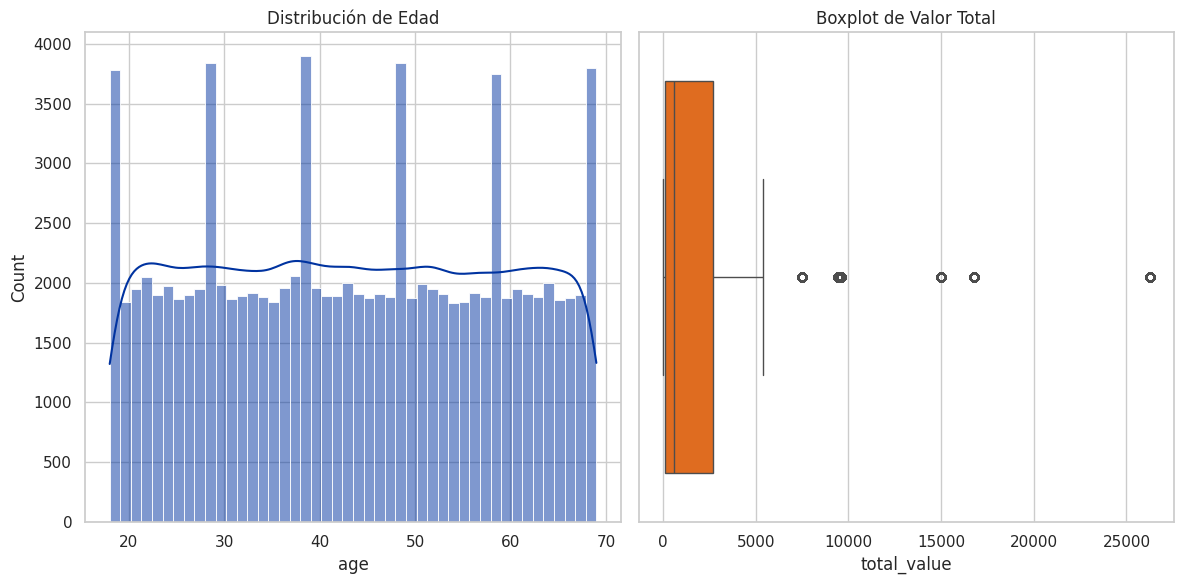

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True, color=corporate_colors[0])
plt.title('Distribución de Edad')


plt.subplot(1, 2, 2)
sns.boxplot(x='total_value', data=df, color=corporate_colors[1])
plt.title('Boxplot de Valor Total')

plt.tight_layout()
plt.show()

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

In [11]:
bins = [0, 30, 50, 100]
labels = ['Jovenes', 'Adultos', 'Mayores']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [12]:
df['age_group'].value_counts()

,count
age_group,
Adultos,38440
Mayores,37974
Jovenes,23043


## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

In [13]:
df["comportamiento_compra"] = pd.cut(df["total_value"], bins=[0, 100, 500, 1000, np.inf], labels=["Bajo", "Medio", "Alto", "Muy Alto"])

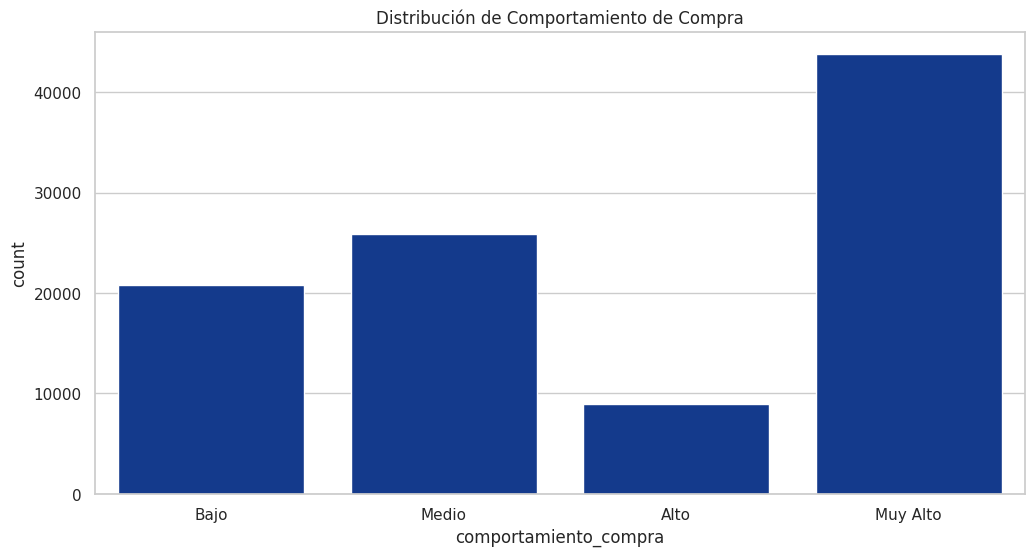

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='comportamiento_compra', color=corporate_colors[0])
plt.title('Distribución de Comportamiento de Compra')
plt.show()

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

tabla cruzada (edad vs categoria de producto):
category   Books  Clothing  Cosmetics  Food & Beverage  Shoes  Souvenir  \
age_group                                                                 
Jovenes     1162      8043       3413             3398   2342      1150   
Adultos     1880     13310       5855             5756   3844      1939   
Mayores     1939     13134       5829             5622   3848      1910   

category   Technology  Toys  
age_group                    
Jovenes          1128  2407  
Adultos          2000  3856  
Mayores          1868  3824  


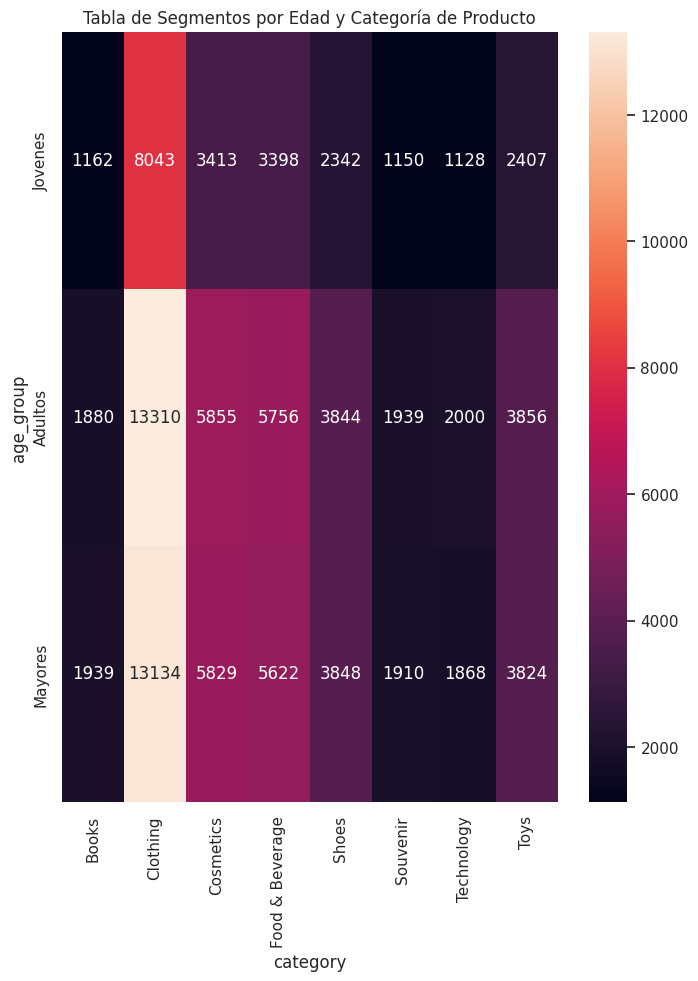

In [20]:
tabla_segmentos = pd.crosstab(df['age_group'], df['category'])
tabla_segmentos
print("tabla cruzada (edad vs categoria de producto):")
print(tabla_segmentos)

plt.figure(figsize=(8,10))
sns.heatmap(tabla_segmentos, annot=True, fmt="d")
plt.title('Tabla de Segmentos por Edad y Categoría de Producto')
plt.show()

## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

In [30]:
# === 1. Ver frecuencia de cada categoría ===
print("Frecuencia original de categorías:\n")
print(df['category'].value_counts())

# === 2. Agrupar categorías poco frecuentes ===
# Definir un umbral: por ejemplo, categorías con menos de 2 registros se agrupan en "Otros"
umbral = 2
frecuencia = df['category'].value_counts()
categorias_poco_frecuentes = frecuencia[frecuencia < umbral].index

# Reemplazar esas categorías por “Otros”
df['category_agrupada'] = df['category'].replace(categorias_poco_frecuentes, 'Otros')

# === 3. (Opcional) Combinar categorías relacionadas manualmente ===
# Por ejemplo, agrupar "Electrónica", "Tecnología", "Videojuegos" en una macro categoría
df['category_agrupada'] = df['category_agrupada'].replace({
    'technology': 'Tecnología/Entretenimiento',
    'toys': 'Tecnología/Entretenimiento'
})

# === 4. Revisar resultados ===
print("\nFrecuencia de categorías agrupadas:\n")
print(df['category_agrupada'].value_counts())

print("\nVista final del DataFrame:\n")
print(df[['customer_id', 'category', 'category_agrupada']])


Frecuencia original de categorías:

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

Frecuencia de categorías agrupadas:

category_agrupada
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

Vista final del DataFrame:

      customer_id         category category_agrupada
0         C241288         Clothing          Clothing
1         C111565            Shoes             Shoes
2         C266599         Clothing          Clothing
3         C988172            Shoes             Shoes
4         C189076            Books             Books
...           ...              ...               ...
99452     C441542         Souvenir          Sou

## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [29]:
def asignar_segmento(row):
  return f"{row['age_group']} - {row['comportamiento_compra']}"

df['segmento_combinado'] = df.apply(asignar_segmento, axis=1)
seg_counts = df['segmento_combinado'].value_counts().reset_index()
seg_counts.columns = ['segmento_combinado', 'count']
seg_counts

,segmento_combinado,count
0,Adultos - Muy Alto,16967
1,Mayores - Muy Alto,16698
2,Jovenes - Muy Alto,10122
3,Adultos - Medio,10045
4,Mayores - Medio,9800
5,Adultos - Bajo,8029
6,Mayores - Bajo,7963
7,Jovenes - Medio,6050
8,Jovenes - Bajo,4782
9,Mayores - Alto,3513


## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

valor total de compra promedio por segmento:
    segmento_combinado  valor_promedio
0       Adultos - Alto      676.704896
1       Adultos - Bajo       37.911370
2      Adultos - Medio      244.192771
3   Adultos - Muy Alto     5449.702375
4       Jovenes - Alto      677.123346
5       Jovenes - Bajo       37.746508
6      Jovenes - Medio      247.448793
7   Jovenes - Muy Alto     5434.041672
8       Mayores - Alto      673.715602
9       Mayores - Bajo       37.813415
10     Mayores - Medio      243.876989
11  Mayores - Muy Alto     5439.570742


/tmp/ipython-input-1025080675.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segmento_combinado', y='valor_promedio', data=promedio_por_segmento, palette=corporate_colors)
/tmp/ipython-input-1025080675.py:7: UserWarning: 
The palette list has fewer values (3) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='segmento_combinado', y='valor_promedio', data=promedio_por_segmento, palette=corporate_colors)


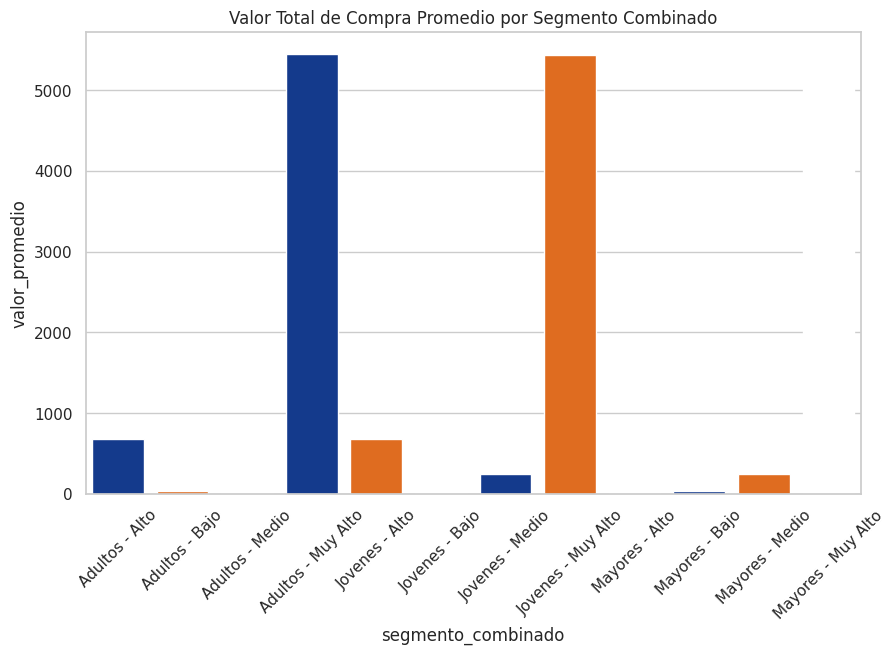

In [31]:
promedio_por_segmento = df.groupby('segmento_combinado')['total_value'].mean().reset_index()
promedio_por_segmento.columns = ['segmento_combinado', 'valor_promedio']
print("valor total de compra promedio por segmento:")
print(promedio_por_segmento)

plt.figure(figsize=(10, 6))
sns.barplot(x='segmento_combinado', y='valor_promedio', data=promedio_por_segmento, palette=corporate_colors)
plt.title('Valor Total de Compra Promedio por Segmento Combinado')
plt.xticks(rotation=45)
plt.show()

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

Segun la grafica los segmentos con mayor volor promedio son: ADULTOS Y JOVENES

Para el segmento ADULTOS BAJO Y JOVENES BAJO, se podria realizar estrategias de fidelización para incentivar la compra, tipo promociones o descuentos progresivos. Programa de puntos a canjear. Comunicacion enfocada al ahorro

Los productos de alto valor agregado atraen principalmente a los segmentos MUY ALTO los productos de consumo frecuente o bajo costo BAJO o MEDIO

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

Segmentos de alto valor: adultos y jovenes muy alto -> prioridad de inversión


50% a los segmentos de alto valor
30% a los segmentos de medio valor
20% a los segmentos de bajo valor

Valor promedio de compra
frecuencia de compra
tasa de retencion o recompra
ROI